In [ ]:
# Install (if needed in Colab)
# !pip install seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [ ]:
# Upload dataset if needed
# from google.colab import files
# uploaded = files.upload()

# Load dataset (Mall_Customers.csv should be uploaded in Colab files)
df = pd.read_csv("Mall_Customers.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Select only relevant features: Income & Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


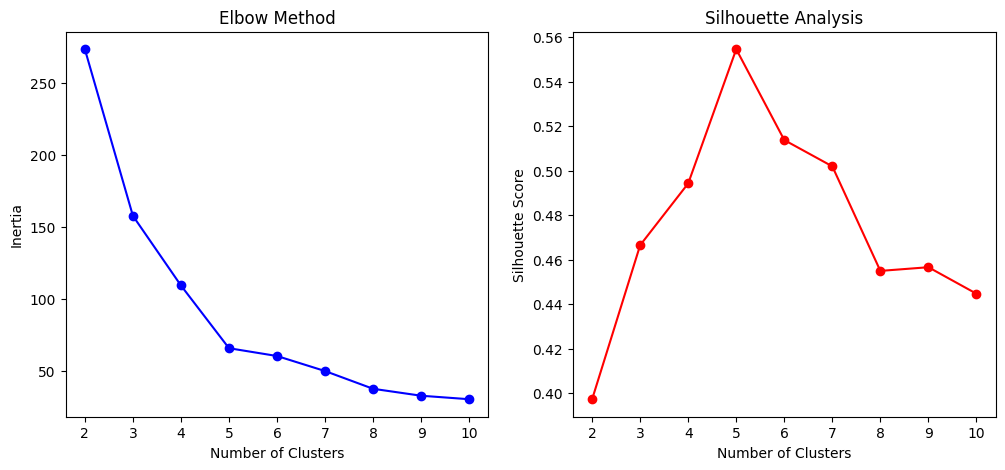

In [ ]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot results
plt.figure(figsize=(12,5))

# Elbow Method
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")

# Silhouette Analysis
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.show()


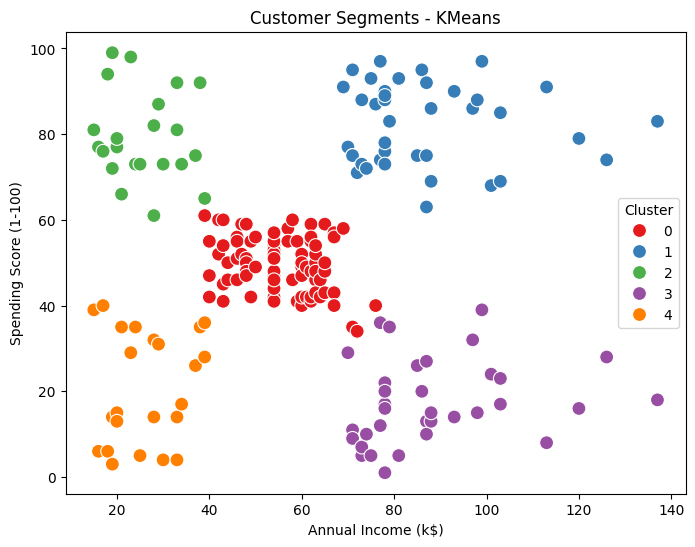

In [ ]:
# Choose k=5 (common from Mall dataset, or pick from above plots)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['Cluster'],
                palette="Set1", s=100)
plt.title("Customer Segments - KMeans")
plt.show()


In [ ]:
# Mean values per cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary:\n")
print(cluster_summary)


Cluster Summary:

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


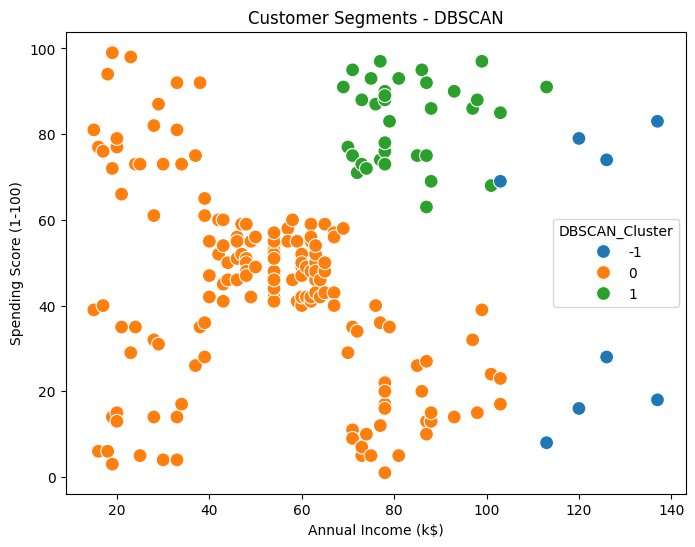

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'],
                y=df['Spending Score (1-100)'],
                hue=df['DBSCAN_Cluster'],
                palette="tab10", s=100)
plt.title("Customer Segments - DBSCAN")
plt.show()


In [ ]:
spending_per_cluster = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending per Cluster:\n")
print(spending_per_cluster)


Average Spending per Cluster:

Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64
